In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [8]:
dataset_path="C:\\Users\\Mayuri\\OneDrive\\Desktop\\DL\\Pneumonia_X_Ray"
img_width, img_height=150, 150

Preprocessing with ImageDataGenerator

In [9]:
datagen=ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)

In [10]:
train_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'train'),
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='binary',
    subset='training',
)

Found 1632 images belonging to 2 classes.


In [11]:
val_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'train'),
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 408 images belonging to 2 classes.


In [12]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(img_width,img_height,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
     MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

C:\Users\Mayuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [15]:
history=model.fit(train_data,validation_data=val_data,epochs=10)

Epoch 1/10


C:\Users\Mayuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8016 - loss: 0.8082 - val_accuracy: 0.9436 - val_loss: 0.1976
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9302 - loss: 0.1776 - val_accuracy: 0.9657 - val_loss: 0.1121
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9545 - loss: 0.1193 - val_accuracy: 0.9779 - val_loss: 0.0873
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9615 - loss: 0.0931 - val_accuracy: 0.9804 - val_loss: 0.0833
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9795 - loss: 0.0625 - val_accuracy: 0.9828 - val_loss: 0.0745
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9816 - loss: 0.0509 - val_accuracy: 0.9681 - val_loss: 0.1046
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9805 - loss: 0.0616 - val_accuracy: 0.9804 - val_loss: 0.0904
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9839 - loss: 0.0408 - val_accuracy: 0.9779 - val_loss: 0.1103
Epo

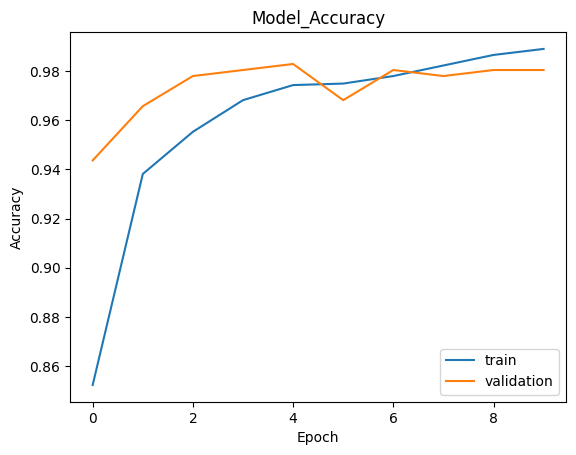

In [16]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.title("Model_Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
test_loss,test_acc=model.evaluate(val_data)
print("Validation Loss:",test_loss)
print("Validation Accuracy:",test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 542ms/step - accuracy: 0.9777 - loss: 0.1339
Validation Loss: 0.11331045627593994
Validation Accuracy: 0.9803921580314636


In [23]:
def predict_brain_tumor(img_path):
    img=load_img(img_path,target_size=(img_width,img_height))
    img_array=img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    if prediction[0]>0.5:
        print("Tumor Detected")
    else:
        print("No Tumor Detected")
predict_brain_tumor("C:\\Users\\Mayuri\\OneDrive\\Desktop\\DL\\Pneumonia_X_Ray\\train\\PNEUMONIA\\person3_bacteria_11.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Tumor Detected


In [27]:
def predict_brain_tumor(img_path):
    img=load_img(img_path,target_size=(img_width,img_height))
    img_array=img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    if prediction[0]>0.5:
        print("Tumor Detected")
    else:
        print("No Tumor Detected")
predict_brain_tumor("C:\\Users\\Mayuri\\OneDrive\\Desktop\\DL\\Pneumonia_X_Ray\\train\\NORMAL\\NORMAL2-IM-0653-0001.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
No Tumor Detected
